# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [2]:
import numpy as np
import pandas as pd
house_df = pd.read_csv('../data/housing.data', header=None, sep='\s+')

house_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', "LSTAT", "MEDV"]

house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

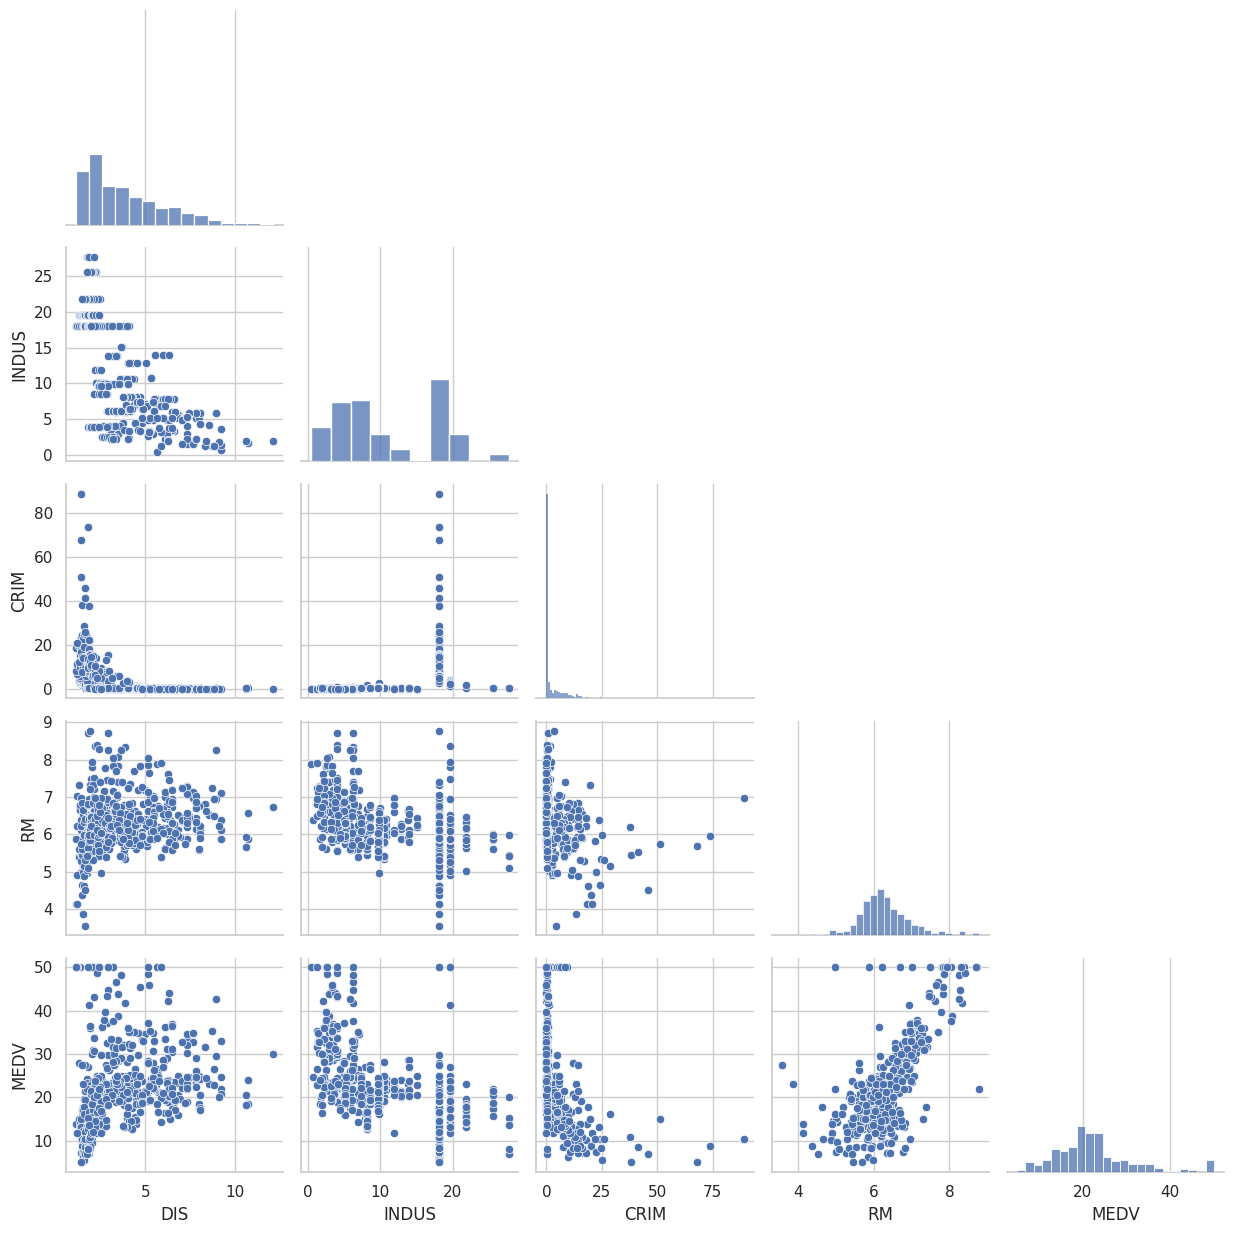

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dar estilos predefinidos
sns.set_theme(style='whitegrid', context='notebook', palette='deep')

# Escoger 5 variables importantes para hacer relaciones entre ellas y como se distribuyen entre ellas
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

# Hacer el primer grafico
sns.pairplot(house_df[cols], height=2.5, corner=True)

plt.tight_layout()

plt.show()



Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

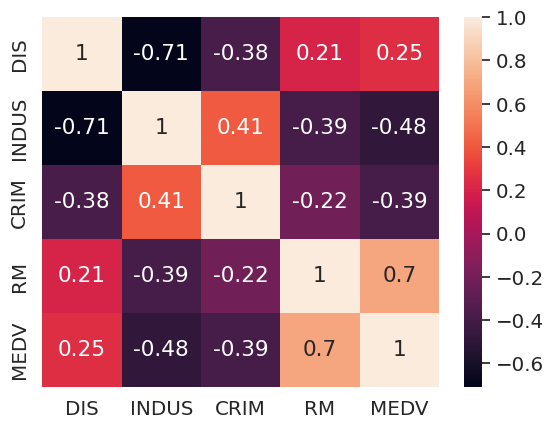

In [4]:
# cm = np.corrcoef(house_df[cols].values.T)
sns.set(font_scale=1.3)
sns.heatmap(house_df[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

## Creando modelo con scikit-learn

In [5]:
# Escalamiento de los datos -> ajustando el modelo
from sklearn.preprocessing import StandardScaler
# importar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Definir las variables dependientes y independientes
X = house_df['RM'].values.reshape(-1, 1) # Variable independiente
y = house_df['MEDV'].values.reshape(-1, 1) # Variable dependiente

# Instanciamos el modelo de escalamiento de los datos
sc_x = StandardScaler()
sc_y = StandardScaler()

# Ajustar los datos estandarizados z = (x - u) / std
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y)


slr = LinearRegression()
# Entrenar el modelo con los datos estandarizado
slr.fit(X_std, Y_std)

LinearRegression()

## Análisis de resultados

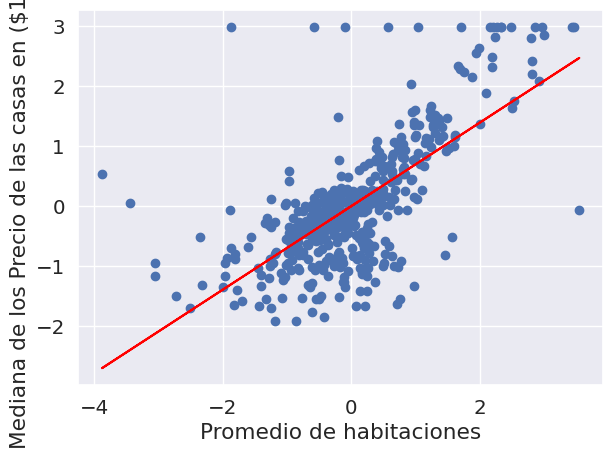

In [6]:
# Graficar

plt.scatter(X_std, Y_std)
# Graficar la linea recta con prediccion
plt.plot(X_std, slr.predict(X_std), color='red')
plt.ylabel('Mediana de los Precio de las casas en ($1000)')
plt.xlabel('Promedio de habitaciones')


plt.tight_layout()
plt.show()

## Generando predicción con el modelo

In [9]:
num_habitaciones = 5
# Valor estandarizado
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))

price = sc_y.inverse_transform(slr.predict(num_habitaciones_std))

print(f"El precio de una casa con 5 habitaciones en boston es de: ${price.item(0) * 1000}")

El precio de una casa con 5 habitaciones en boston es de: $10839.924129462986
